## Student Habit vs Academic Performance EDA

- This is a simulated dataset exploring how lifestyle habits affect academic performance in students. With 1,000 synthetic student records and 15+ features including study hours, sleep patterns, social media usage, diet quality, mental health, and final exam scores.
- Ever wondered how much Netflix, sleep, or TikTok scrolling affects your grades? This dataset simulates 1,000 students' daily habits—from study time to mental health—and compares them to final exam scores. It's like spying on your GPA through the lens of lifestyle.

### Dataset Features Description:
| Feature Name                    | Description (Short)                                               |
|--------------------------------|-------------------------------------------------------------------|
| student_id                     | Unique ID assigned to each student                               |
| age                            | Age of the student (in years)                                    |
| gender                         | Gender of the student (Male/Female)                              |
| study_hours_per_day            | Avg. number of hours spent studying daily                        |
| social_media_hours             | Daily usage time on social media (in hours)                      |
| netflix_hours                  | Daily time spent watching Netflix or similar platforms           |
| part_time_job                  | Whether the student has a part-time job (Yes/No)                 |
| attendance_percentage          | Class attendance percentage                                      |
| sleep_hours                    | Average sleep duration per day (in hours)                        |
| diet_quality                   | Quality of diet (Poor/Fair/Good)                                 |
| exercise_frequency             | Days per week the student does exercise                          |
| parental_education_level       | Highest education level of the student's parents                 |
| internet_quality               | Quality of internet connection (Poor/Average/Good)               |
| mental_health_rating           | Mental health score (1-10 scale, 10 = best)                      |
| extracurricular_participation  | Participation in extracurricular activities (Yes/No)             |
| exam_score                     | Final exam score (target variable)                               |

### Problem Statement:

In today's academic landscape, a student's performance is influenced by more than just textbooks and classrooms. Personal habits such as sleep patterns, study hours, internet usage, diet quality, and parental background significantly impact learning outcomes. 

This project aims to analyze and model the relationship between **student habits** and their **academic performance** using data science and machine learning techniques. 

By exploring key behavioral factors, we seek to answer:
- Which habits contribute positively or negatively to academic success?
- Can we predict a student’s performance based on their lifestyle patterns?
- What actionable insights can be derived to support students and educators?

The final goal is to build an end-to-end machine learning pipeline that can not only **analyze** but also **predict** student performance and offer meaningful insights to improve it.


#### (1.) Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

#### (2.) Data Loading and Exploration

In [2]:
df = pd.read_csv('data/student_habits_performance.csv')

# Display the first 5 rows of the dataframe
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
# Display the last 5 rows of the dataframe
df.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [4]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
# Statistics of the dataframe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
student_id,1000,1000,S1999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1000.0,NaN,NaN,NaN,20.498,2.3081,17.0,18.75,20.0,23.0,24.0
gender,1000,3,Female,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
study_hours_per_day,1000.0,NaN,NaN,NaN,3.5501,1.46889,0.0,2.6,3.5,4.5,8.3
social_media_hours,1000.0,NaN,NaN,NaN,2.5055,1.172422,0.0,1.7,2.5,3.3,7.2
netflix_hours,1000.0,NaN,NaN,NaN,1.8197,1.075118,0.0,1.0,1.8,2.525,5.4
part_time_job,1000,2,No,785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attendance_percentage,1000.0,NaN,NaN,NaN,84.1317,9.399246,56.0,78.0,84.4,91.025,100.0
sleep_hours,1000.0,NaN,NaN,NaN,6.4701,1.226377,3.2,5.6,6.5,7.3,10.0
diet_quality,1000,3,Fair,437,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check for the missing values in the dataframe
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [7]:
# Records with missing values in 'parental_education_level' feature
df[df['parental_education_level'].isnull()]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,S1010,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,S1033,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,S1047,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,S1074,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,S1093,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,S1921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,S1925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,S1939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


In [8]:
# Records with highest marks with different parental education levels
df.groupby('parental_education_level')['exam_score'].max().sort_values(ascending=False)

parental_education_level
Bachelor       100.0
High School    100.0
Master         100.0
Name: exam_score, dtype: float64

In [9]:
# Records with lowest marks with different parental education levels
df.groupby('parental_education_level')['exam_score'].min().sort_values(ascending=False)

parental_education_level
Master         26.8
High School    23.1
Bachelor       18.4
Name: exam_score, dtype: float64

In [10]:
# Value counts of 'parental_education_level'
df['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [11]:
# Checking for duplicates in the dataframe
df.duplicated().sum()

np.int64(0)

In [12]:
# Drop 'student_id' column as it is not needed for analysis
df.drop(columns=['student_id'],inplace=True)

df.head()


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [13]:
# Number of categorical and numerical features
num_categorical = len(df.select_dtypes(include=['object']).columns)
num_numerical = len(df.select_dtypes(include=['number']).columns)

print(f"Number of categorical features: {num_categorical}")
print(f"Features: {df.select_dtypes(include=['object']).columns.tolist()}")
print('\n')
print(f"Number of numerical features: {num_numerical}")
print(f"Features: {df.select_dtypes(include=['number']).columns.tolist()}")

Number of categorical features: 6
Features: ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


Number of numerical features: 9
Features: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


#### Conclusions:
1. Dataset contains 1000 records with 16 features (including 'student_id' feature), where 6 features are categorical and 9 features are numerical.
2. Only Feature 'parental_education_level' have 91 missing values in it.
3. No duplicates were found in dataset.

### (3.) Data Cleaning/Preprocessing

**Handling Missing Values**
   - The feature `parental_education_level` contained **91 missing values**, which accounts for approximately **9% of the dataset**.
   - Dropping this feature or these rows would have resulted in significant data loss.
   - Instead of removing, we filled the missing values with a new category **"Not Disclosed"** to retain the records and possibly capture any hidden patterns associated with missing parental education data.

In [14]:
# Filling missing values in 'parental_education_level' with 'Not Disclosed'
df['parental_education_level'] = df['parental_education_level'].fillna('Not Disclosed')

df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [15]:
df.isna().sum()

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [16]:
# Now, Value counts of 'parental_education_level'
df['parental_education_level'].value_counts()

parental_education_level
High School      392
Bachelor         350
Master           167
Not Disclosed     91
Name: count, dtype: int64

### (4.) Exploratory Data Analysis (EDA)

##### (4.1) Histogram and KDE

#### Distribution of Exam Scores

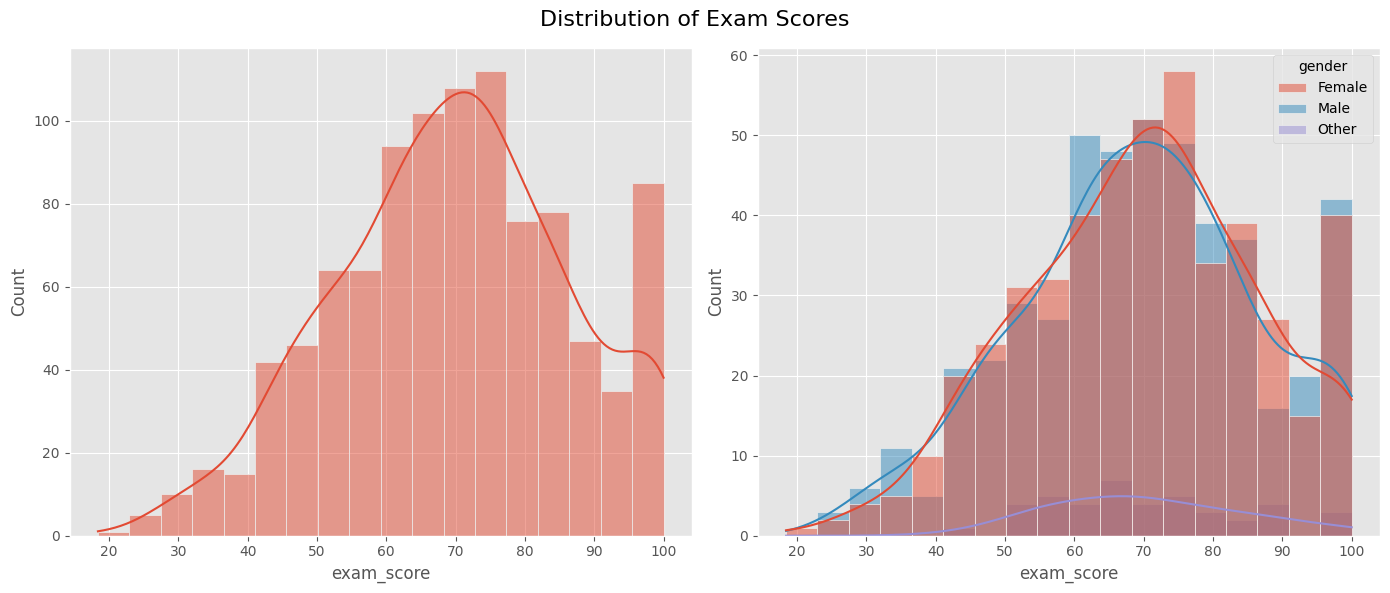

In [17]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
plt.suptitle('Distribution of Exam Scores', fontsize=16)
sns.histplot(data=df, x='exam_score', kde=True, ax=axes[0])
sns.histplot(data=df, x='exam_score', hue='gender', kde=True, ax=axes[1])
plt.tight_layout()

- Description: Histogram showing the overall distribution of students’ final exam scores, with a second panel coloring by gender.
- Insight: Exam scores are spread across the range with most students clustered in the middle. Both male and female students exhibit very similar score distributions (no obvious gender gap).

#### Distribution of Exam Scores based on Parental Education Level

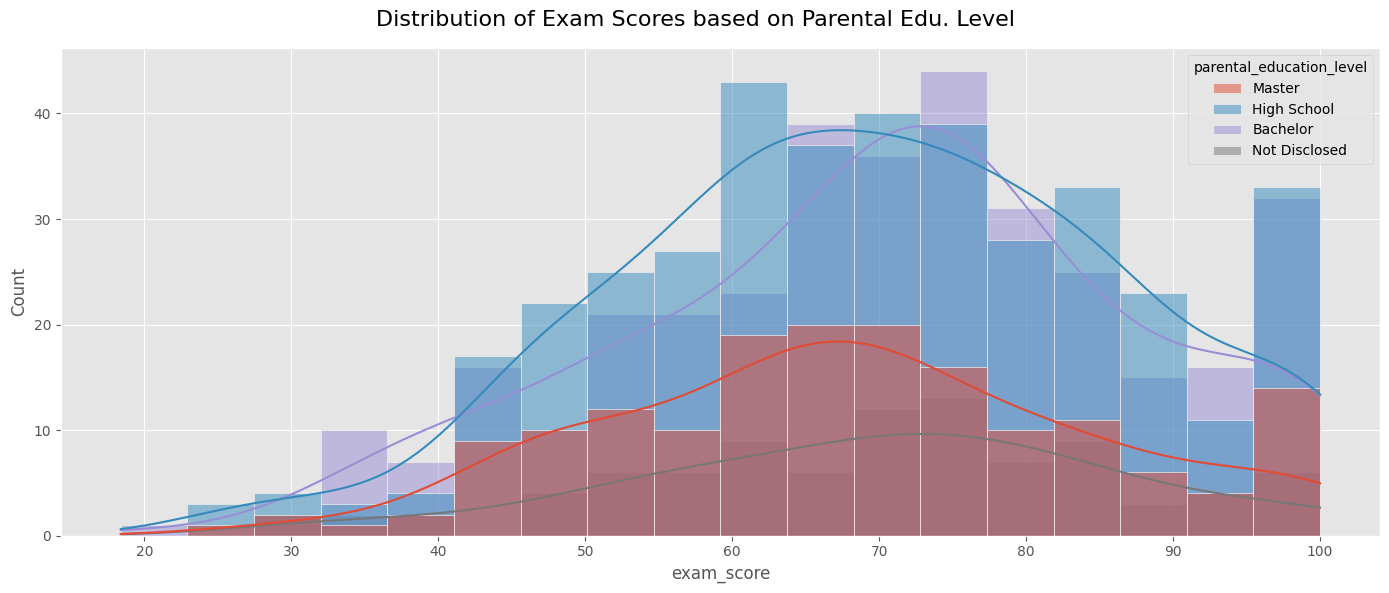

In [18]:
plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Exam Scores based on Parental Edu. Level', fontsize=16)
sns.histplot(data=df, x='exam_score', hue='parental_education_level', kde=True)
plt.tight_layout()

- Description: Histogram of exam scores with separate curves (hues) for each parental education category (e.g. High School, Bachelor, Master).
- Insight: Students whose parents have higher education levels (e.g. Master’s degrees) tend to score slightly higher on average. The distribution for higher parental education is shifted a bit right (toward higher scores) compared to lower levels.

#### Distribution of Exam Scores based on Extracurricular Participation

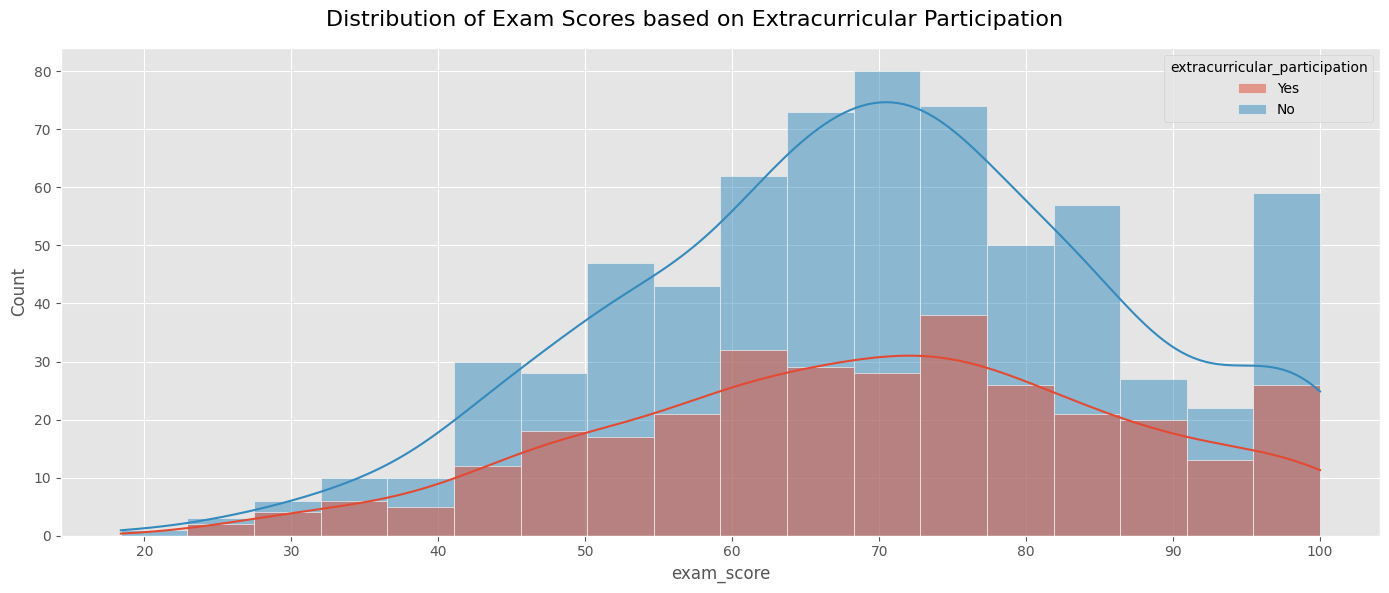

In [19]:
plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Exam Scores based on Extracurricular Participation', fontsize=16)
sns.histplot(data=df, x='exam_score', hue='extracurricular_participation', kde=True)
plt.tight_layout()

- Description: Histogram of exam scores split by whether students participate in extracurricular activities (Yes/No).
- Insight: Students who participate in extracurriculars have a distribution of scores similar to non-participants, though there is a slight tendency for participants to achieve higher scores. Overall, extracurricular participation does not drastically lower academic performance.

#### Distribution of Exam Scores based on Part Time Job

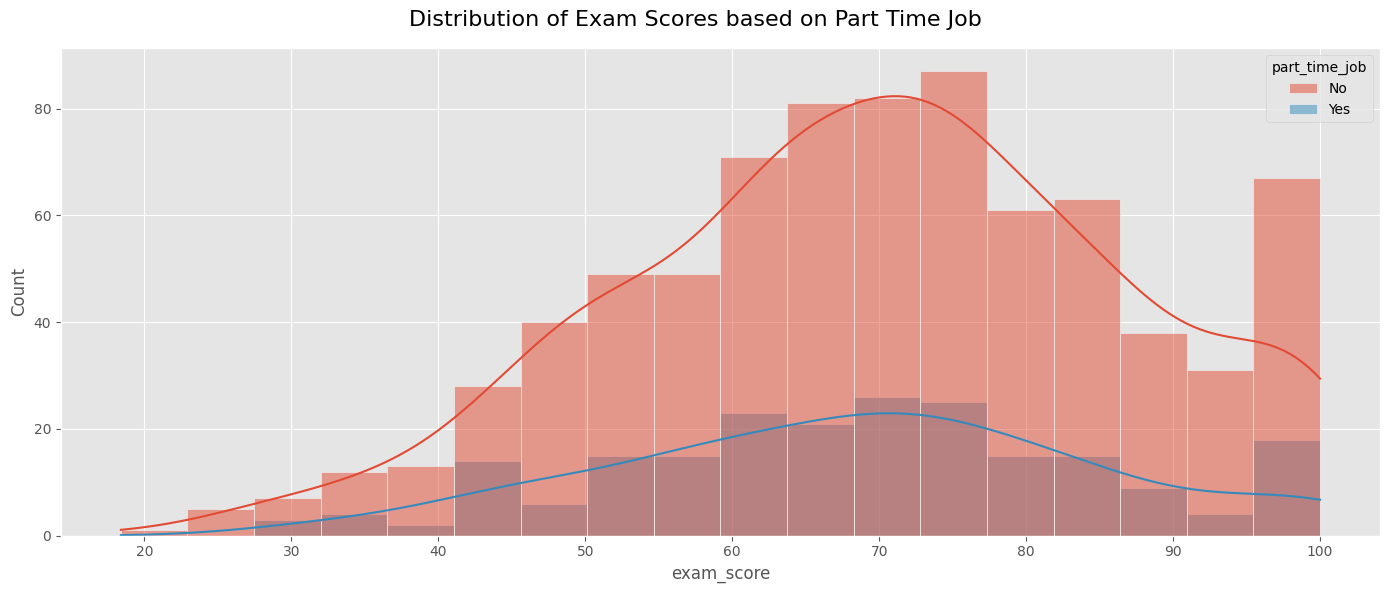

In [20]:
plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Exam Scores based on Part Time Job', fontsize=16)
sns.histplot(data=df, x='exam_score', hue='part_time_job', kde=True)
plt.tight_layout()

- Description: Histogram of exam scores split by students’ part-time job status (Yes/No).
- Insight: Students with part-time jobs tend to have slightly lower exam scores on average than those without jobs. The score distribution for “No job” is centered slightly higher, suggesting more free study time may boost performance.

#### Distribution of Avg. Study Hours per Day

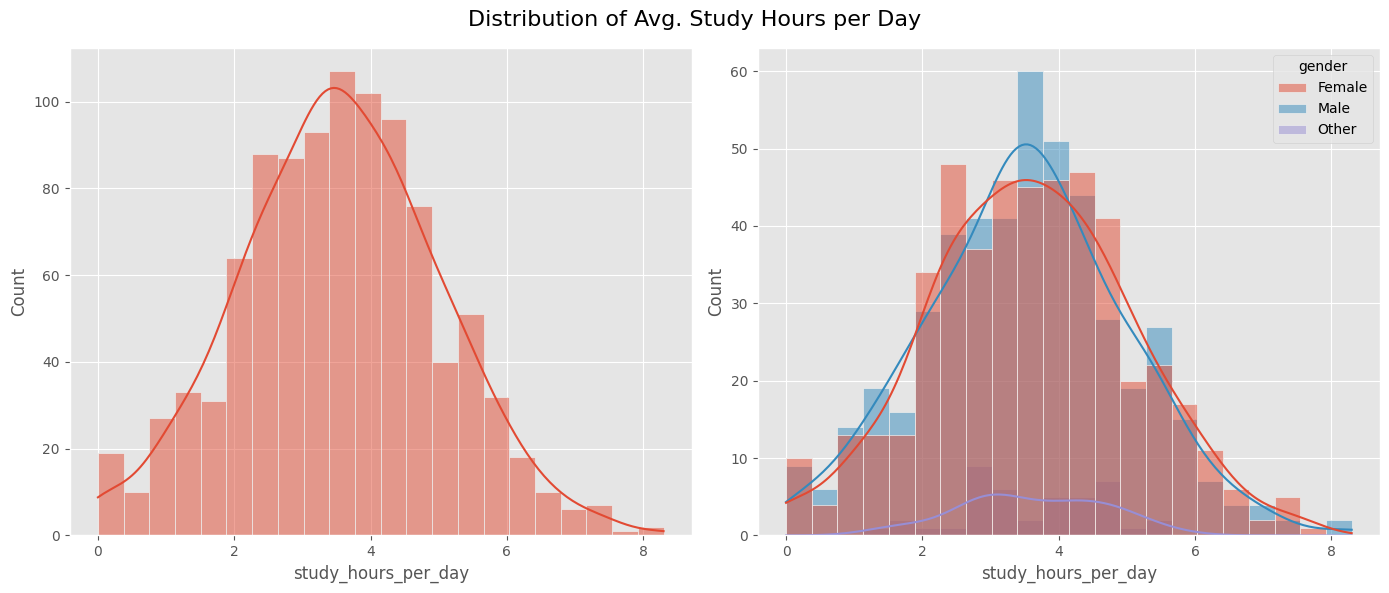

In [21]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
plt.suptitle('Distribution of Avg. Study Hours per Day', fontsize=16)
sns.histplot(data=df, x='study_hours_per_day', kde=True, ax=axes[0])
sns.histplot(data=df, x='study_hours_per_day', hue='gender', kde=True, ax=axes[1])
plt.tight_layout()

- Description: Histogram of students’ average daily study hours, with and without splitting by gender.
- Insight: Most students study only a few hours per day. The distribution is skewed toward lower values (many around 1–3 hours) with fewer students studying long hours. Both genders follow a similar pattern, indicating a general trend of light daily study time.

#### Distribution of Attendance Percentage

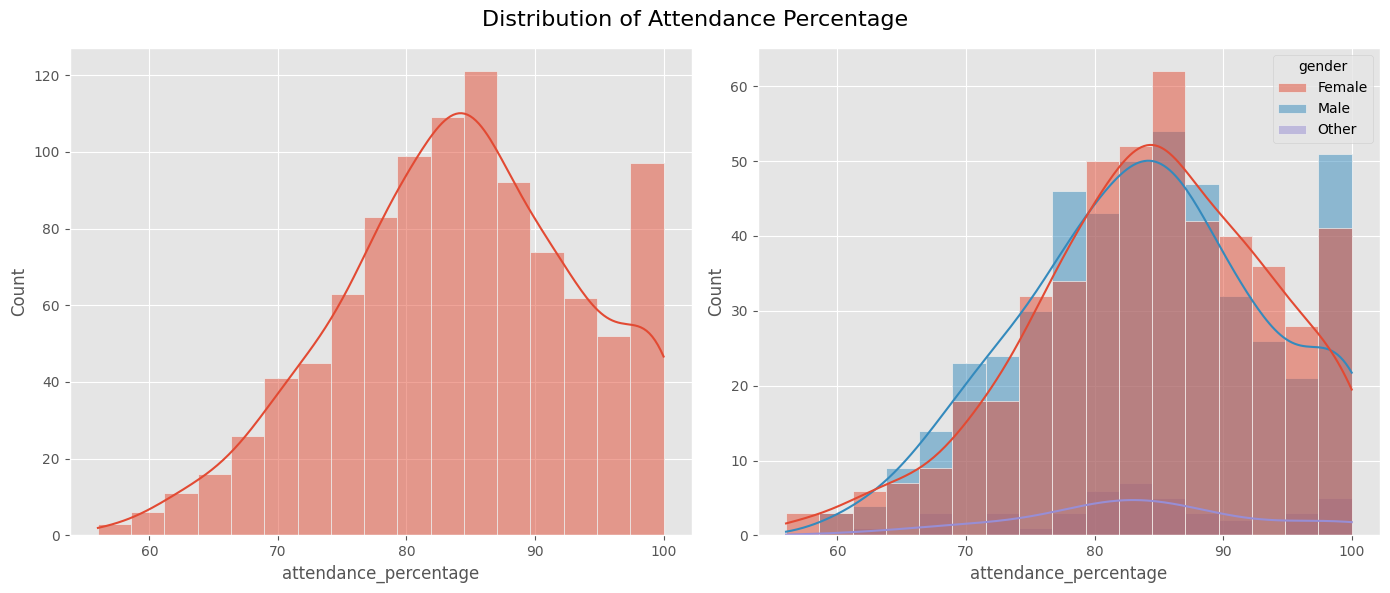

In [22]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
plt.suptitle('Distribution of Attendance Percentage', fontsize=16)
sns.histplot(data=df, x='attendance_percentage', kde=True, ax=axes[0])
sns.histplot(data=df, x='attendance_percentage', hue='gender', kde=True, ax=axes[1])
plt.tight_layout()

- Description: Histogram of class attendance percentages, overall and separated by gender.
- Insight: Attendance is generally high: the majority of students attend most classes (distribution peaks near the upper end, e.g. above 80%). Males and females have very similar attendance patterns, suggesting high overall engagement.

#### Distribution of Students Age

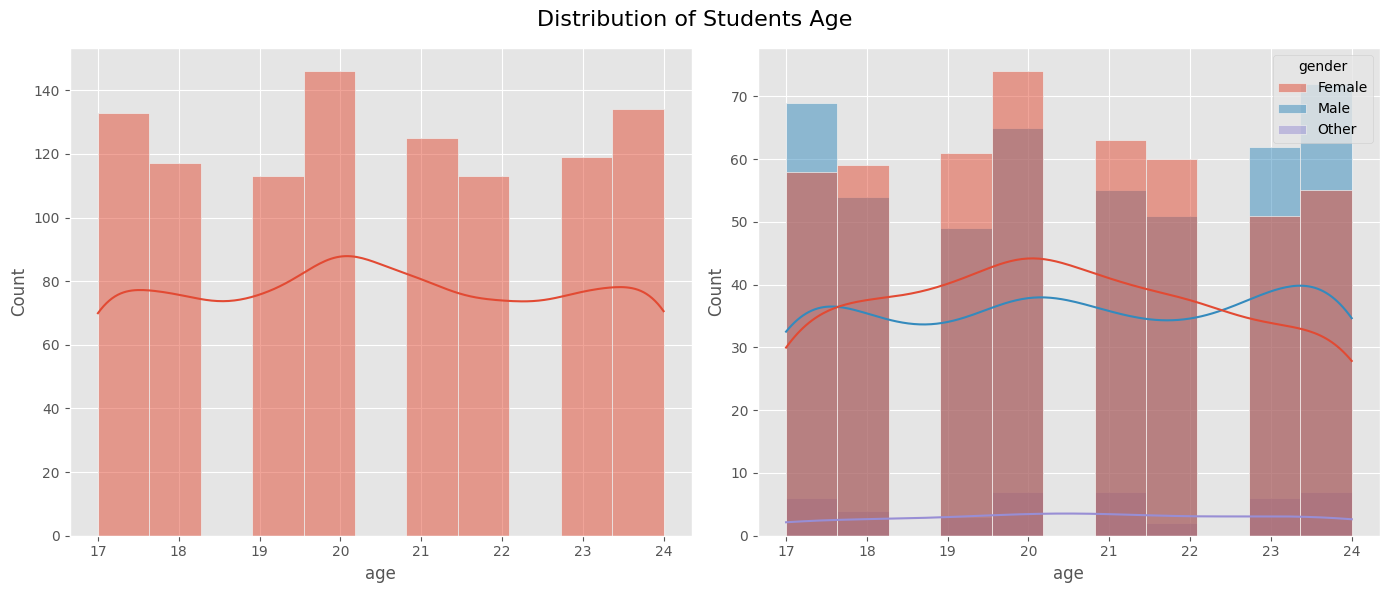

In [23]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
plt.suptitle('Distribution of Students Age', fontsize=16)
sns.histplot(data=df, x='age', kde=True, ax=axes[0])
sns.histplot(data=df, x='age', hue='gender', kde=True, ax=axes[1])
plt.tight_layout()

- Description: Histogram of student ages (years), overall and by gender.
- Insight: The age distribution is tightly clustered around a typical student age (likely early 20s). There are few outliers. Both genders follow the same age profile, indicating a uniform age range among students.

#### Distribution of Other Numerical Features (Netflix, Social Media, and Sleep Hours)

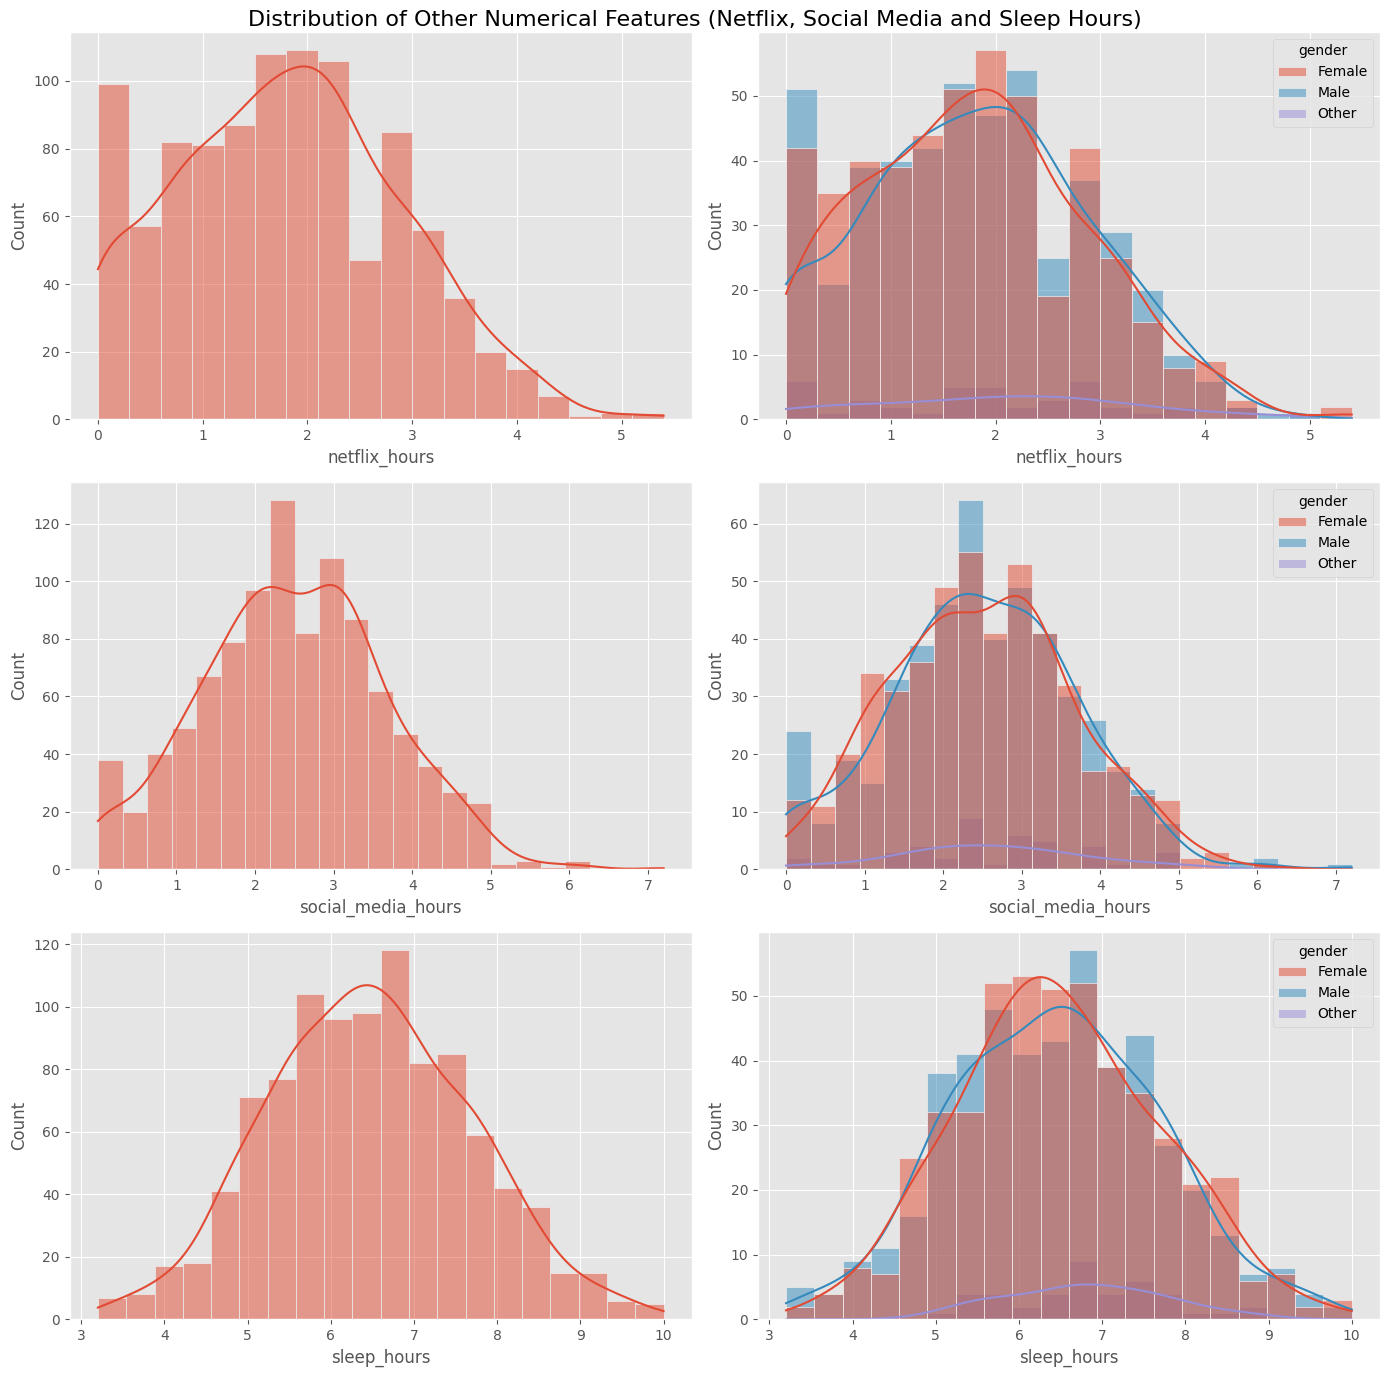

In [24]:
# Distribution of other numerical features like: 'netflix_hours', 'social_media_hours', 'sleep_hours'
fig, axes = plt.subplots(3,2, figsize=(14,14))
plt.suptitle('Distribution of Other Numerical Features (Netflix, Social Media and Sleep Hours)', fontsize=16)
sns.histplot(data=df, x='netflix_hours', kde=True, ax=axes[0,0])
sns.histplot(data=df, x='netflix_hours', hue='gender', kde=True, ax=axes[0,1])

sns.histplot(data=df, x='social_media_hours', kde=True, ax=axes[1,0])
sns.histplot(data=df, x='social_media_hours', hue='gender', kde=True, ax=axes[1,1])

sns.histplot(data=df, x='sleep_hours', kde=True, ax=axes[2,0])
sns.histplot(data=df, x='sleep_hours', hue='gender', kde=True, ax=axes[2,1])

plt.tight_layout()

- Description: A set of histograms for daily hours spent on Netflix, social media, and sleep (each with and without gender split).
- Insight: Most students spend relatively few hours on Netflix or social media (distribution heavily weighted toward the low end), whereas sleep hours cluster around a healthy amount (e.g. 7–8 hours per day). There are no large gender differences: both genders spend similar time on these activities.

##### (4.2) Countplot and Bar Charts

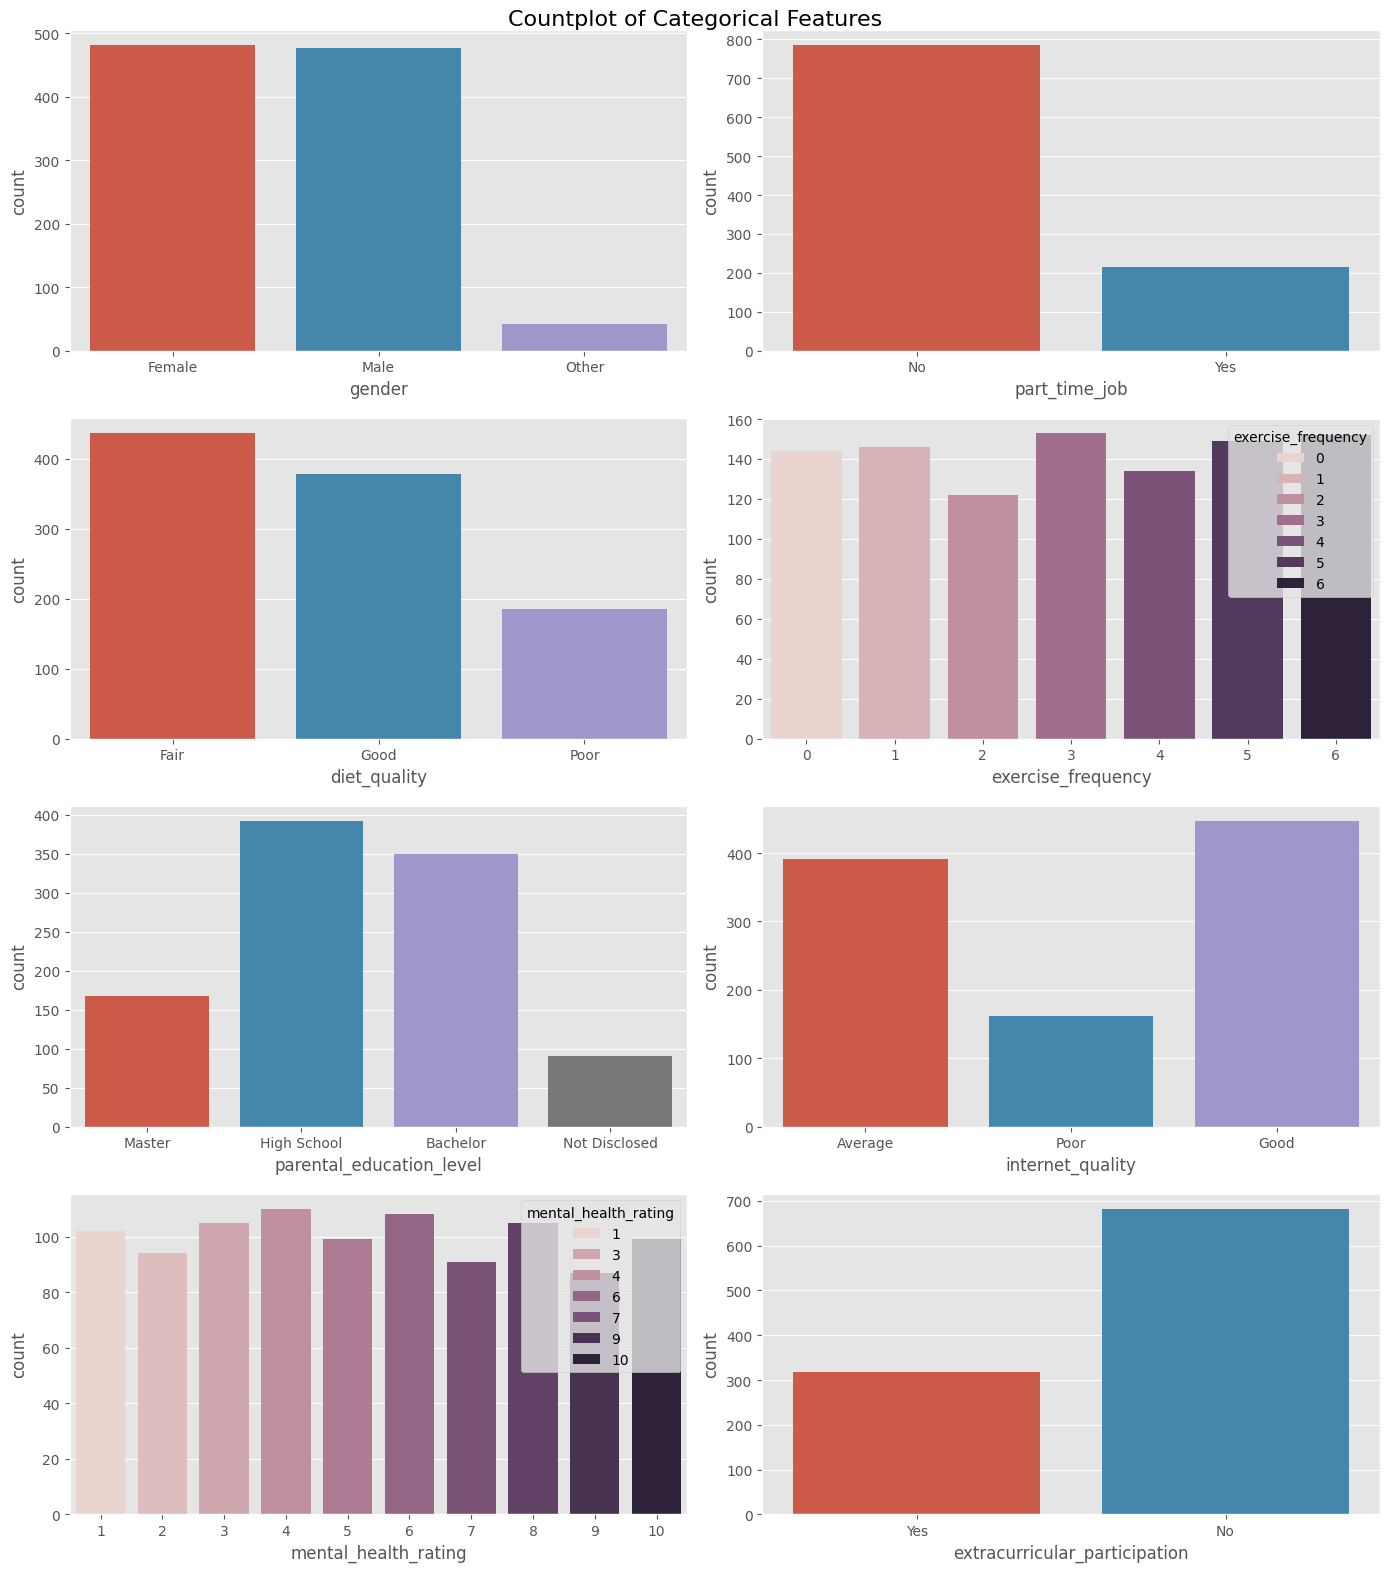

In [25]:
fig, ax = plt.subplots(4,2, figsize=(14, 16))
plt.suptitle('Countplot of Categorical Features', fontsize=16)

sns.countplot(data=df, x='gender', ax=ax[0,0], hue='gender')
sns.countplot(data=df, x='part_time_job', ax=ax[0,1], hue='part_time_job')
sns.countplot(data=df, x='diet_quality', ax=ax[1,0], hue='diet_quality')
sns.countplot(data=df, x='exercise_frequency', ax=ax[1,1], hue='exercise_frequency')
sns.countplot(data=df, x='parental_education_level', ax=ax[2,0], hue='parental_education_level')
sns.countplot(data=df, x='internet_quality', ax=ax[2,1], hue='internet_quality')
sns.countplot(data=df, x='mental_health_rating', ax=ax[3,0], hue='mental_health_rating')
sns.countplot(data=df, x='extracurricular_participation', ax=ax[3,1], hue='extracurricular_participation')

plt.tight_layout()

- Description: Eight count plots (subplots) showing the frequency of categories for gender, part-time job status, diet quality, exercise frequency, parental education, internet quality, mental health rating, and extracurricular participation.
- Insight: Key patterns emerge: the sample is nearly gender-balanced; most students do not have a part-time job; diet quality tends to lean toward the better categories; a majority engage in extracurricular activities; and most report average or good internet quality. (In summary, students are roughly half male/female, mostly non-working, and largely involved in extracurriculars.)

##### (4.3) Pie Charts for Categorical Features

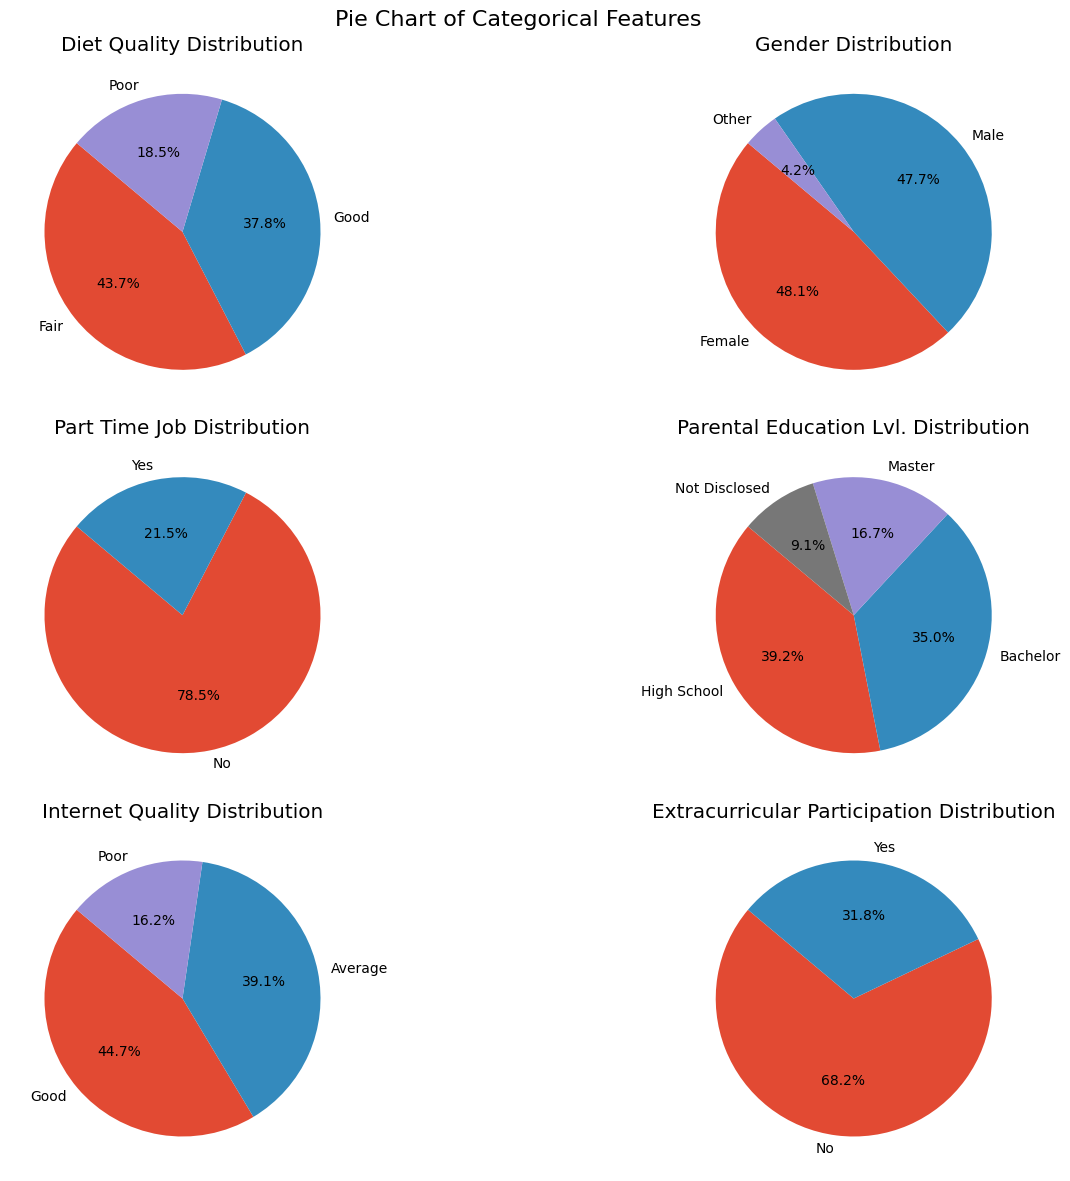

In [26]:
plt.figure(figsize=(16, 12))
plt.suptitle('Pie Chart of Categorical Features', fontsize=16)

plt.subplot(3,2,1)
plt.pie(df['diet_quality'].value_counts(), labels=df['diet_quality'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Diet Quality Distribution')

plt.subplot(3,2,2)
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')

plt.subplot(3,2,3)
plt.pie(df['part_time_job'].value_counts(), labels=df['part_time_job'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Part Time Job Distribution')

plt.subplot(3,2,4)
plt.pie(df['parental_education_level'].value_counts(), labels=df['parental_education_level'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Parental Education Lvl. Distribution')

plt.subplot(3,2,5)
plt.pie(df['internet_quality'].value_counts(), labels=df['internet_quality'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Internet Quality Distribution')

plt.subplot(3,2,6)
plt.pie(df['extracurricular_participation'].value_counts(), labels=df['extracurricular_participation'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Extracurricular Participation Distribution')

plt.tight_layout()

- Description: Pie charts (with percentages) for diet quality, gender, part-time job, parental education level, internet quality, and extracurricular participation.
- Insight: The pie slices confirm that about half the students are male/female, most do not hold part-time jobs (large “No” slice), and a clear majority participate in extracurriculars. Diet-wise, a plurality have good or fair diets. Most students have at least average internet quality. These charts highlight the dominant categories (e.g. no part-time job, extracurricular “Yes”) in the population.

#### (4.4) Realtionship and Correlation Visualizations

##### Ques: Do people who study more really score more marks?

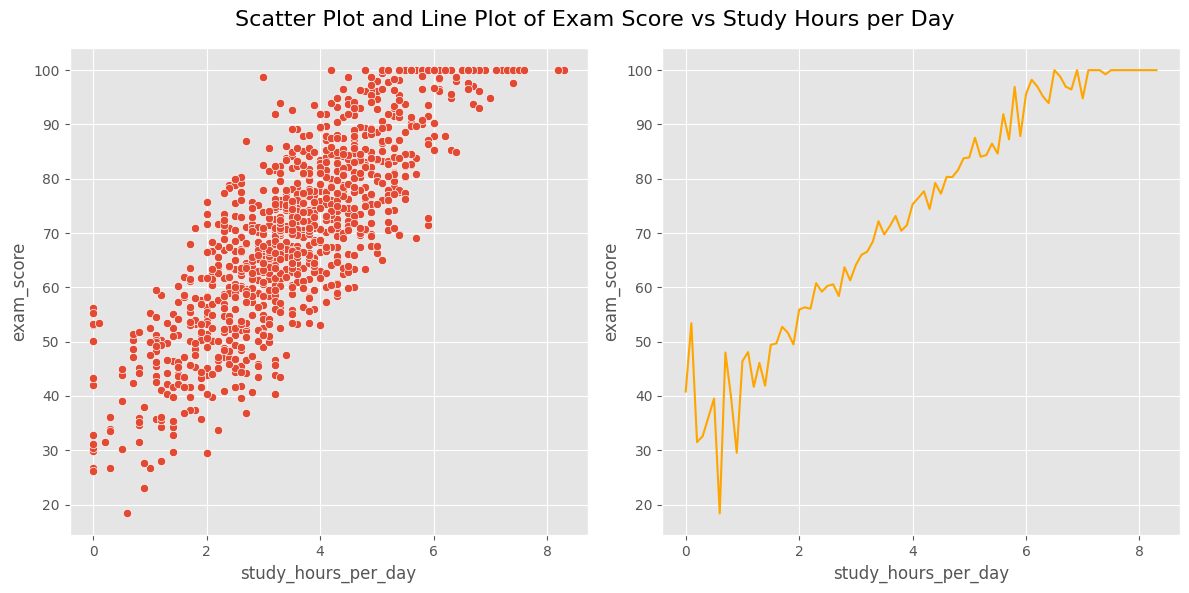

In [27]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
plt.suptitle("Scatter Plot and Line Plot of Exam Score vs Study Hours per Day", fontsize=16)
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', ax=ax[0])
sns.lineplot(data=df, x='study_hours_per_day', y='exam_score', ax=ax[1], color='orange', ci=None)
plt.tight_layout()

- Description: A scatter plot of exam score versus daily study hours, paired with a line plot showing the overall trend.
- Insight: There is a clear positive relationship: students who study more hours tend to achieve higher exam scores. The line plot slopes upward, indicating exam performance generally improves as study time increases.

##### Ques: Those who have a good diet, their brain is also fast?

Text(0, 0.5, 'Average Exam Score')

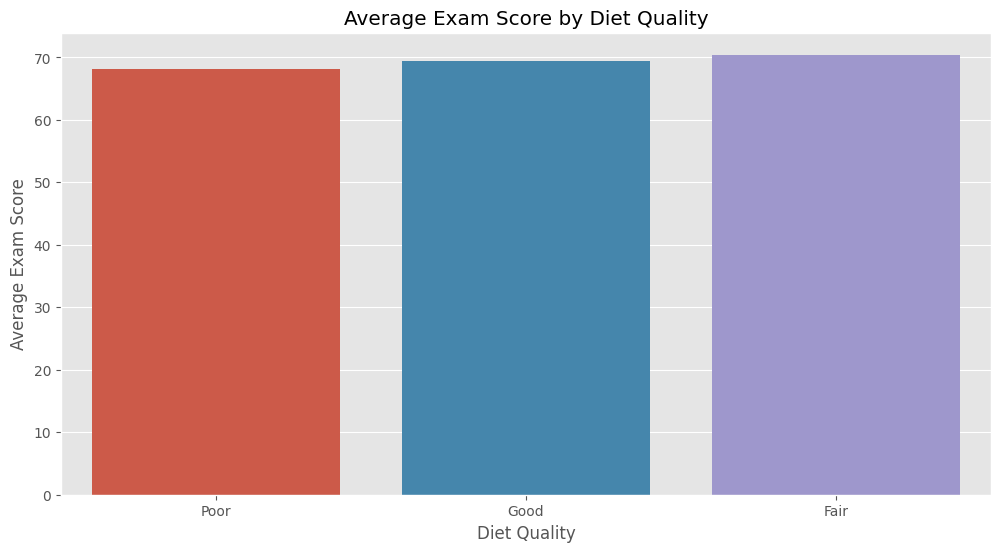

In [28]:
plt.figure(figsize=(12,6))
# Avg exam score based on diet quality
avg_exam_score_diet = df.groupby('diet_quality')['exam_score'].mean().sort_values()
sns.barplot(x=avg_exam_score_diet.index, y=avg_exam_score_diet.values, hue=avg_exam_score_diet.index)
plt.title('Average Exam Score by Diet Quality')
plt.xlabel('Diet Quality')
plt.ylabel('Average Exam Score')

- Description: Bar chart of average exam scores for each diet quality category (Poor/Fair/Good).
- Insight: Better diet quality correlates with higher exam scores. Students reporting “Good” diets have the highest average score, followed by “Fair” and “Poor,” suggesting healthier eating is associated with better academic performance.

##### Ques: How clear is the result for those whose life is on the internet?

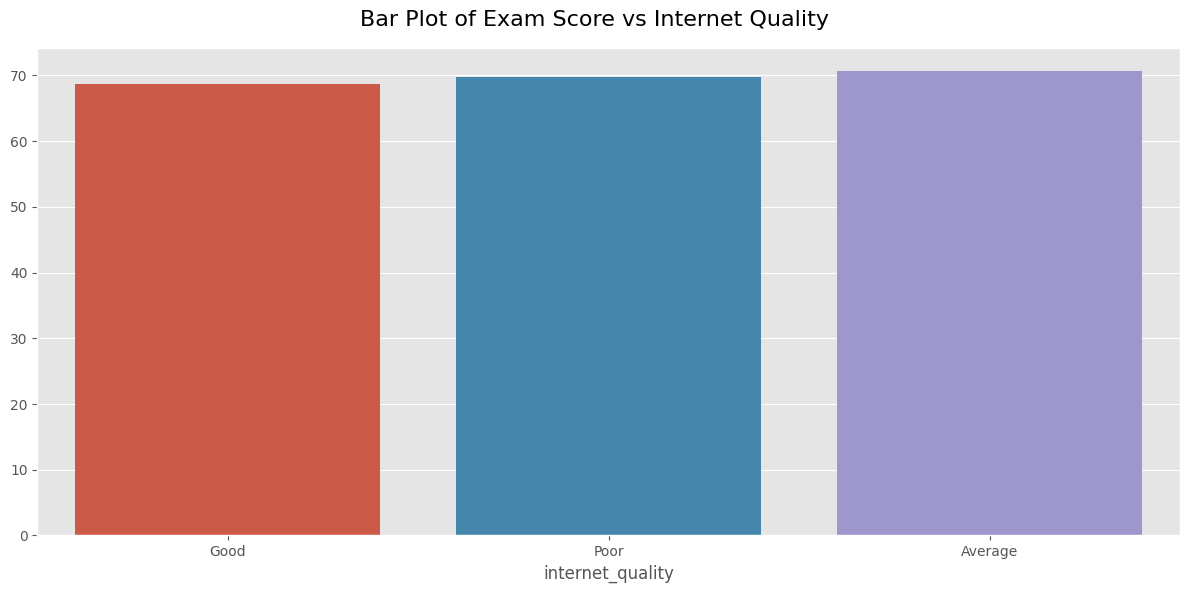

In [29]:
plt.figure(figsize=(12,6))
plt.suptitle("Bar Plot of Exam Score vs Internet Quality", fontsize=16)
avg_exam_score_internet = df.groupby('internet_quality')['exam_score'].mean().sort_values()
sns.barplot(x=avg_exam_score_internet.index, y=avg_exam_score_internet.values, hue=avg_exam_score_internet.index)
plt.tight_layout()

- Description: Bar chart of average exam scores for each internet connection quality category (Poor/Average/Good).
- Insight: Students with better internet quality tend to have slightly higher average scores. The “Good” internet group scores highest on average, indicating that reliable internet may support better studying or access to resources.

##### Ques: How clear is the result for those who spend their time on Social Media and Netflix?

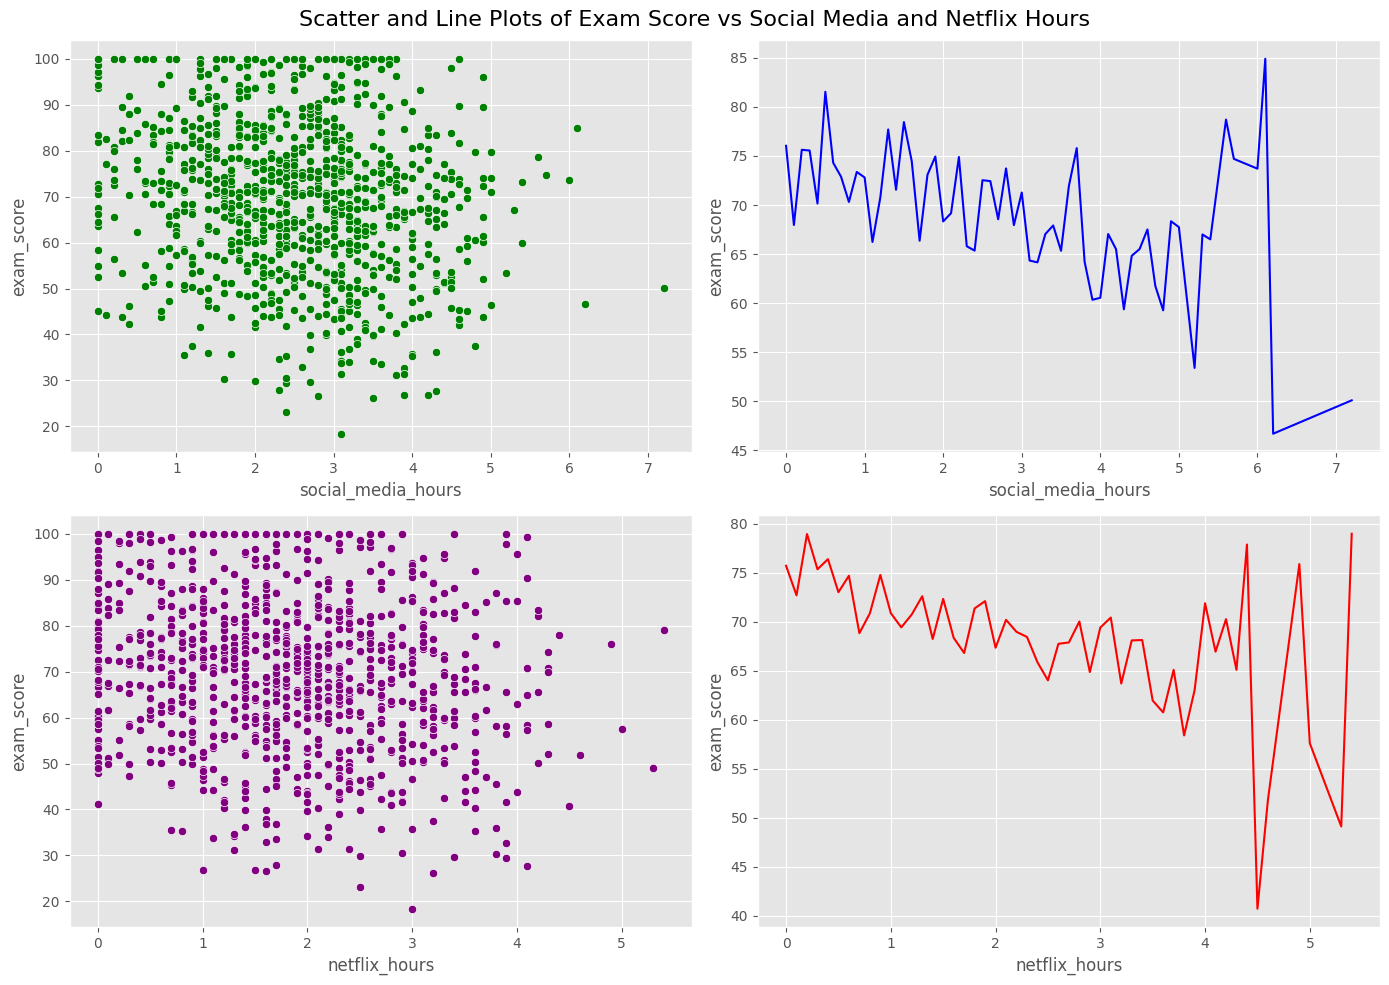

In [30]:
fig, ax = plt.subplots(2,2, figsize=(14,10))
plt.suptitle("Scatter and Line Plots of Exam Score vs Social Media and Netflix Hours", fontsize=16)
sns.scatterplot(data=df, x='social_media_hours', y='exam_score', ax=ax[0,0], color='green')
sns.lineplot(data=df, x='social_media_hours', y='exam_score', ax=ax[0,1], color='blue', ci=None)
sns.scatterplot(data=df, x='netflix_hours', y='exam_score', ax=ax[1,0], color='purple')
sns.lineplot(data=df, x='netflix_hours', y='exam_score', ax=ax[1,1], color='red', ci=None)
plt.tight_layout()

- Description: Four-panel figure: scatter and line plots of exam score vs. social media hours (top row) and vs. Netflix hours (bottom row).
- Insight: There is a negative trend: as time on social media or Netflix increases, exam scores tend to decrease. The line plots slope downward, suggesting that heavy use of these leisure platforms is associated with lower academic performance.

##### Ques: Does sleep affect performance or is it all a lie?

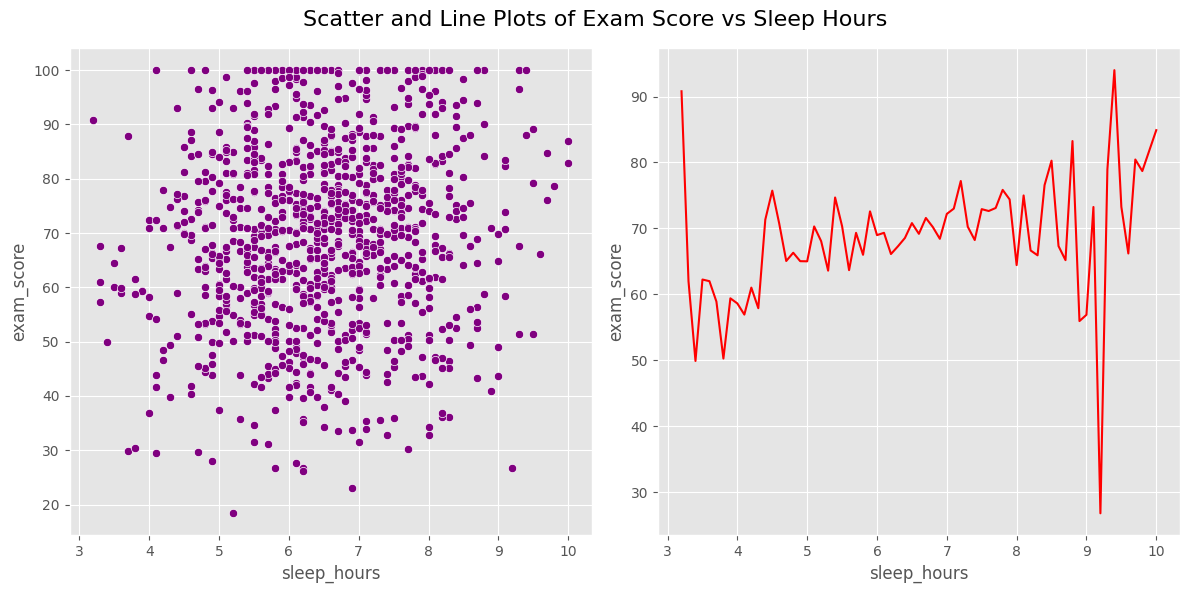

In [31]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
plt.suptitle("Scatter and Line Plots of Exam Score vs Sleep Hours", fontsize=16)
sns.scatterplot(data=df, x='sleep_hours', y='exam_score', ax=ax[0], color='purple')
sns.lineplot(data=df, x='sleep_hours', y='exam_score', ax=ax[1], color='red', ci=None)
plt.tight_layout()

- Description: Two-panel figure: scatter and line plots of exam score vs. sleep hours.
- Insight: More sleep is linked to higher scores. The trend line ascends with increasing sleep hours, implying that students who get more rest generally perform better on exams.

##### Ques: What difference does parents degree make to children's results?

Text(0, 0.5, 'Average Exam Score')

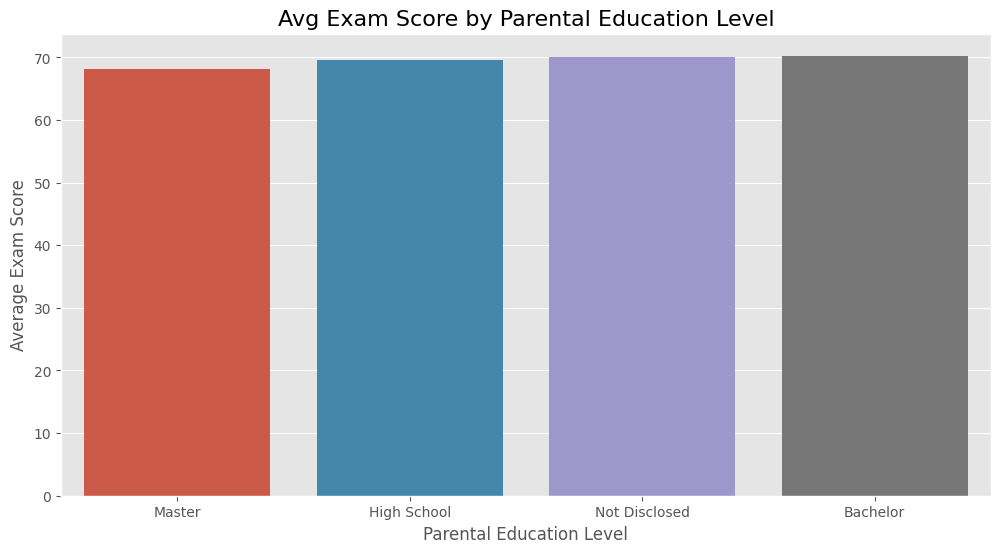

In [32]:
plt.figure(figsize=(12,6))
plt.title("Avg Exam Score by Parental Education Level", fontsize=16)
avg_exam_score_parental_edu = df.groupby('parental_education_level')['exam_score'].mean().sort_values()
sns.barplot(x=avg_exam_score_parental_edu.index, y=avg_exam_score_parental_edu.values, hue=avg_exam_score_parental_edu.index)
plt.xlabel('Parental Education Level')
plt.ylabel('Average Exam Score')

- Description: Bar chart of average exam scores for each category of parental education (e.g. High School, Bachelor’s, Master’s).
- Insight: Higher parental education is associated with higher student scores. Students whose parents have a Bachelor’s or Master’s degree show higher mean exam scores than those whose parents have only high school education.

##### Ques: Does Part Time Job and Extracurricular Participation affect on exam scores? 

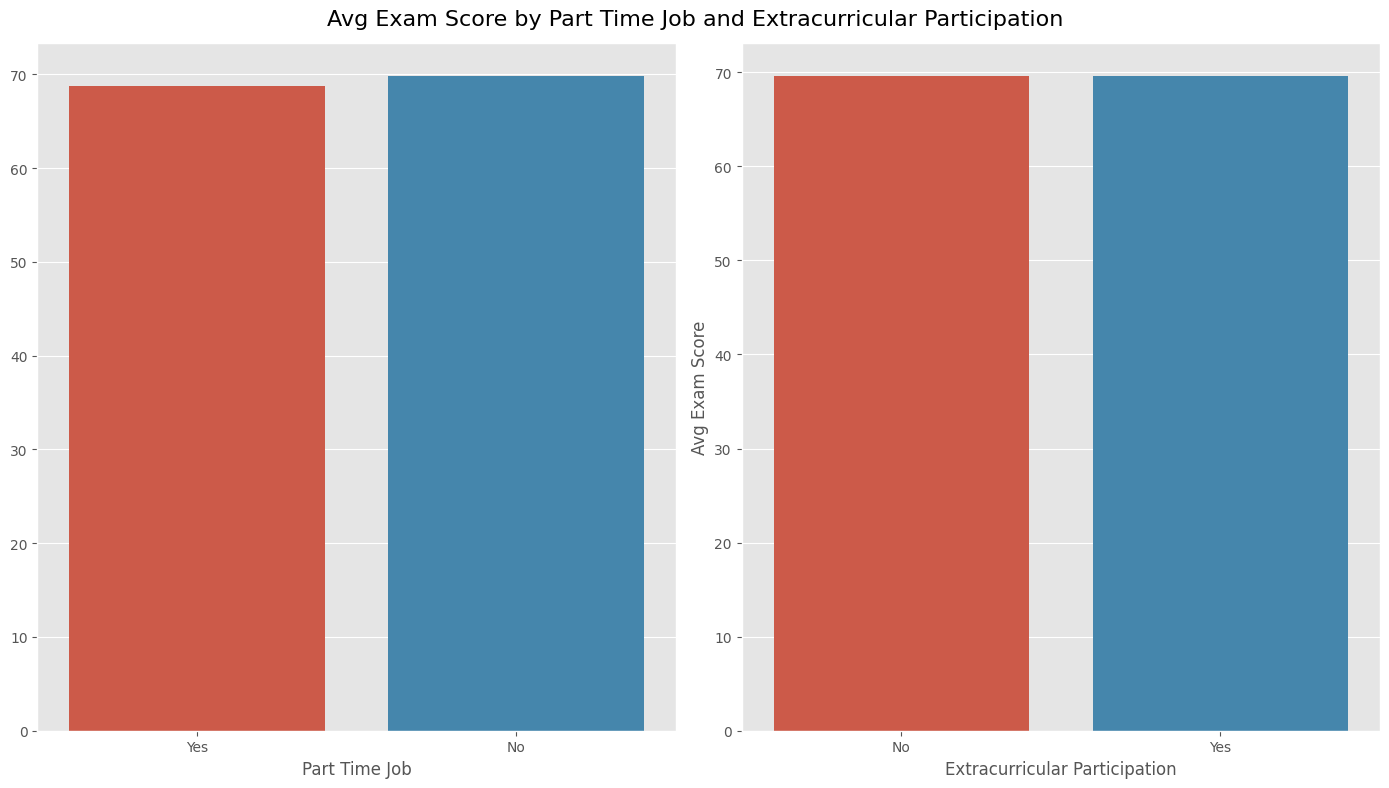

In [33]:
fig, ax = plt.subplots(1,2,figsize=(14,8))

avg_exam_score_part_time_job = df.groupby('part_time_job')['exam_score'].mean().sort_values()
avg_exam_score_extracurricular = df.groupby('extracurricular_participation')['exam_score'].mean().sort_values()

sns.barplot(x=avg_exam_score_part_time_job.index, y=avg_exam_score_part_time_job.values, ax=ax[0], hue=avg_exam_score_part_time_job.index)
sns.barplot(x=avg_exam_score_extracurricular.index, y=avg_exam_score_extracurricular.values, ax=ax[1], hue=avg_exam_score_extracurricular.index)

plt.suptitle("Avg Exam Score by Part Time Job and Extracurricular Participation", fontsize=16)
ax[0].set_xlabel('Part Time Job')
ax[1].set_xlabel('Extracurricular Participation')
plt.ylabel('Avg Exam Score')
plt.tight_layout()

- Description: Two-bar chart (side by side) of average exam score for students with/without part-time jobs (left) and with/without extracurriculars (right).
- Insight: Students without part-time jobs score higher on average than those with jobs, suggesting jobs may detract from study time. Conversely, students who do extracurricular activities score slightly higher than non-participants, implying that engagement in extracurriculars might coincide with better performance.

##### Ques: Does exam score really depends on student's attendance percentage?

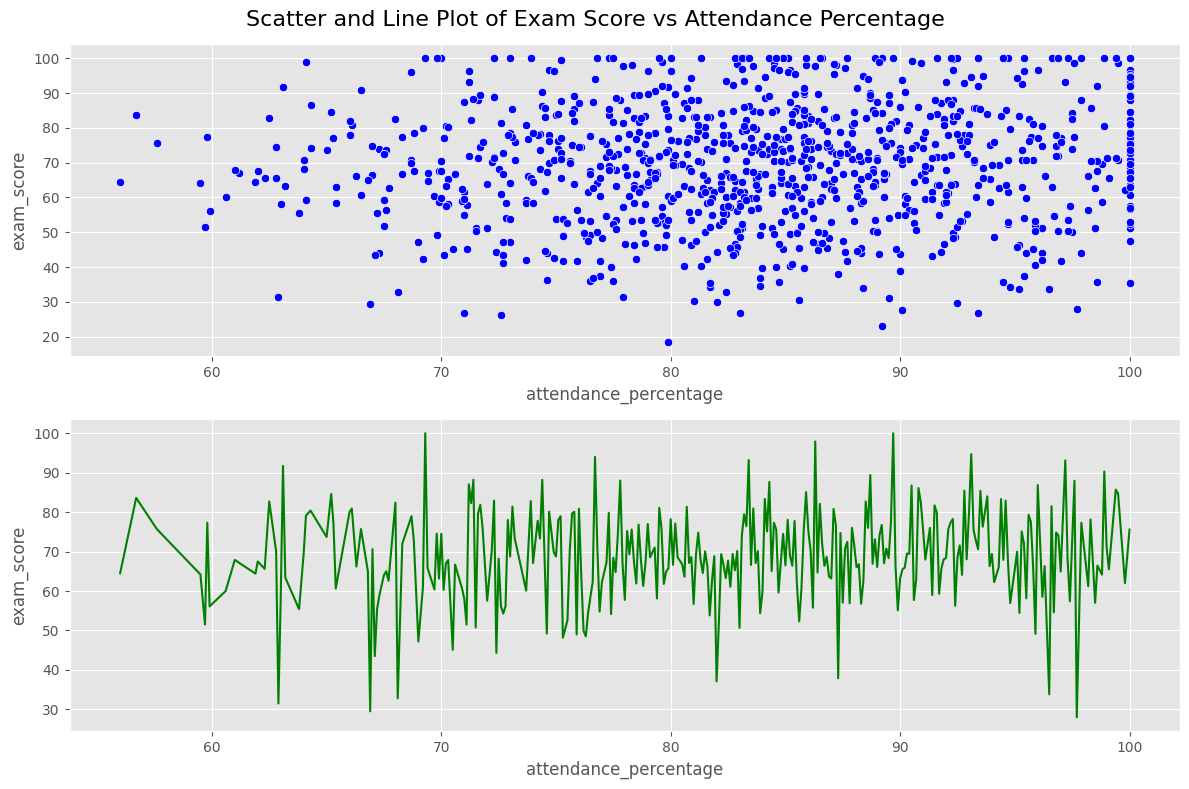

In [34]:
fig, ax = plt.subplots(2,1,figsize=(12,8))
plt.suptitle("Scatter and Line Plot of Exam Score vs Attendance Percentage", fontsize=16)
sns.scatterplot(data=df, x='attendance_percentage', y='exam_score', ax=ax[0], color='blue')
sns.lineplot(data=df, x='attendance_percentage', y='exam_score', ax=ax[1], color='green', ci=None)
plt.tight_layout()


- Description: Two-panel figure: scatter plot and trend line of exam score vs. class attendance percentage.
- Insight: Attendance has a strong positive effect. The trend line shows higher exam scores for higher attendance rates. In other words, students who attend class more consistently tend to achieve better exam results.

##### Ques: Does Exercise Frequency and Mental Health Rating create any positive impact on exam score?

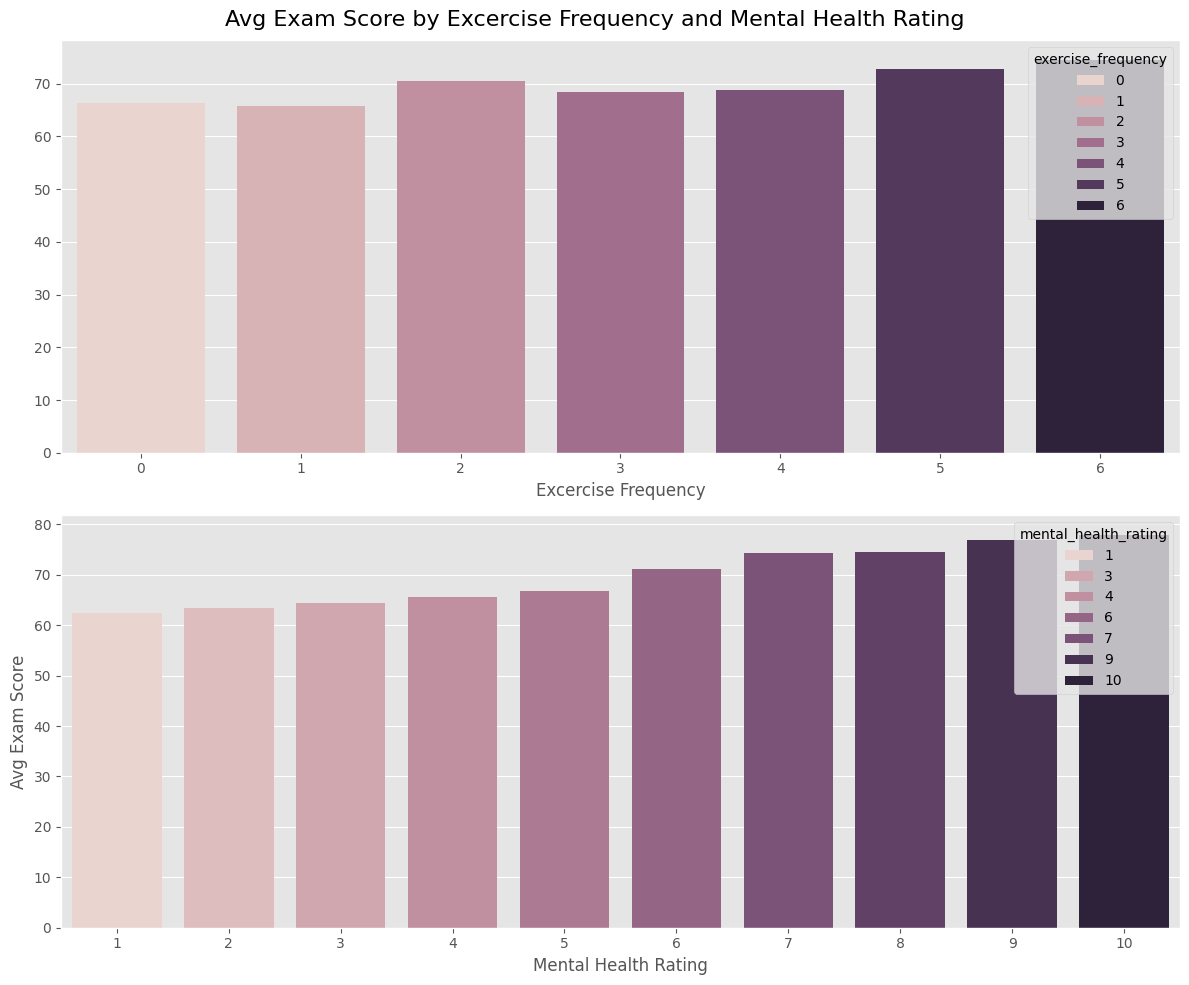

In [35]:
fig, ax = plt.subplots(2,1, figsize=(12,10))

avg_exam_score_excercise = df.groupby('exercise_frequency')['exam_score'].mean().sort_values()
avg_exam_score_mental_health = df.groupby('mental_health_rating')['exam_score'].mean().sort_values()

sns.barplot(x=avg_exam_score_excercise.index, y=avg_exam_score_excercise.values, ax=ax[0], hue=avg_exam_score_excercise.index)
sns.barplot(x=avg_exam_score_mental_health.index, y=avg_exam_score_mental_health.values, ax=ax[1], hue=avg_exam_score_mental_health.index)

plt.suptitle("Avg Exam Score by Excercise Frequency and Mental Health Rating", fontsize=16)
ax[0].set_xlabel('Excercise Frequency')
ax[1].set_xlabel('Mental Health Rating')
plt.ylabel('Avg Exam Score')
plt.tight_layout()

- Description: Two-bar chart of average exam score by exercise frequency (left) and by mental health rating (right).
- Insight: Both factors show positive associations with performance. Students who exercise more days per week have higher average scores, and similarly, those with higher mental health ratings also score higher on average. This suggests well-being (exercise and mental health) correlates with better academics.

### (5.) Feature Engineering

In [36]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [37]:
# categoraical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    print(f"Feature '{feature}' : {len(df[feature].unique())} unique values")
    print('\n')

Feature 'gender' : 3 unique values


Feature 'part_time_job' : 2 unique values


Feature 'diet_quality' : 3 unique values


Feature 'parental_education_level' : 4 unique values


Feature 'internet_quality' : 3 unique values


Feature 'extracurricular_participation' : 2 unique values




#### (5.1) Feature Encoding

In [38]:
# OneHot Encoding for 'gender' feature
from sklearn.preprocessing import OneHotEncoder

# Assume df is your DataFrame
ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid dummy variable trap

# Reshape the gender column and apply OHE
gender_encoded = ohe.fit_transform(df[['gender']])

# Create dataframe with encoded column names
gender_encoded_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['gender']))

# Concatenate with original df (and drop original 'gender' column)
df = pd.concat([df.drop('gender', axis=1), gender_encoded_df], axis=1)

df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,gender_Male,gender_Other
0,23,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,0.0,0.0
1,20,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,0.0,0.0
2,21,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,1.0,0.0
3,23,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,0.0,0.0
4,19,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,0.0,0.0


In [39]:
# Label Encoding for 'part_time_job' and 'extracurricular_participation' features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['part_time_job'] = le.fit_transform(df['part_time_job'])
df['extracurricular_participation'] = le.fit_transform(df['extracurricular_participation'])

df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,gender_Male,gender_Other
0,23,0.0,1.2,1.1,0,85.0,8.0,Fair,6,Master,Average,8,1,56.2,0.0,0.0
1,20,6.9,2.8,2.3,0,97.3,4.6,Good,6,High School,Average,8,0,100.0,0.0,0.0
2,21,1.4,3.1,1.3,0,94.8,8.0,Poor,1,High School,Poor,1,0,34.3,1.0,0.0
3,23,1.0,3.9,1.0,0,71.0,9.2,Poor,4,Master,Good,1,1,26.8,0.0,0.0
4,19,5.0,4.4,0.5,0,90.9,4.9,Fair,3,Master,Good,1,0,66.4,0.0,0.0


In [40]:
# Ordinal Encoding for 'diet_quality', 'parental_education_level' and 'internet_quality' features
from sklearn.preprocessing import OrdinalEncoder

ordinal_features = ['diet_quality', 'parental_education_level', 'internet_quality']
ordinal_encoder = OrdinalEncoder(categories='auto')

for feature in ordinal_features:
    df[feature] = ordinal_encoder.fit_transform(df[[feature]])
df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,gender_Male,gender_Other
0,23,0.0,1.2,1.1,0,85.0,8.0,0.0,6,2.0,0.0,8,1,56.2,0.0,0.0
1,20,6.9,2.8,2.3,0,97.3,4.6,1.0,6,1.0,0.0,8,0,100.0,0.0,0.0
2,21,1.4,3.1,1.3,0,94.8,8.0,2.0,1,1.0,2.0,1,0,34.3,1.0,0.0
3,23,1.0,3.9,1.0,0,71.0,9.2,2.0,4,2.0,1.0,1,1,26.8,0.0,0.0
4,19,5.0,4.4,0.5,0,90.9,4.9,0.0,3,2.0,1.0,1,0,66.4,0.0,0.0


In [41]:
df.tail()

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,gender_Male,gender_Other
995,21,2.6,0.5,1.6,0,77.0,7.5,0.0,2,1.0,1.0,6,1,76.1,0.0,0.0
996,17,2.9,1.0,2.4,1,86.0,6.8,2.0,1,1.0,0.0,6,1,65.9,0.0,0.0
997,20,3.0,2.6,1.3,0,61.9,6.5,1.0,5,0.0,1.0,9,1,64.4,1.0,0.0
998,24,5.4,4.1,1.1,1,100.0,7.6,0.0,0,0.0,0.0,1,0,69.7,1.0,0.0
999,19,4.3,2.9,1.9,0,89.4,7.1,1.0,2,0.0,0.0,8,0,74.9,0.0,0.0


In [42]:
# Save cleaned and encoded daatframe to a new CSV file
df.to_csv('data/cleaned_stud_habits_performance.csv', index=False)